In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# load data
weather = pd.read_csv("climatedatawithdate.csv")
weather.head()


,puttalam,tauu,rlus,sfcWind,rsuscs,rsus,rsdscs,prw,hurs,rtmt,...,tasmax,tasmin,tauv,tro3_500,tro3_850,ts,uas,wap_850,zg_850,date
0,63.3,0.152785,0.142045,0.477828,0.454995,0.497287,0.322817,0.440015,0.638365,0.298824,...,0.135349,0.221053,0.224634,0.673354,0.863010,0.147308,0.130948,0.736840,0.739986,1/1/1980
1,65.8,0.160138,0.264588,0.367296,0.726774,0.744863,0.662825,0.319734,0.468713,0.599960,...,0.374378,0.241274,0.308724,0.710253,0.673910,0.286245,0.128115,0.909573,0.615100,2/1/1980
2,101.1,0.244791,0.591772,0.126316,0.988048,0.980332,0.980188,0.177955,0.008800,0.629573,...,0.728056,0.390637,0.452436,0.705782,0.774462,0.631751,0.235086,0.537343,0.570181,3/1/1980
3,247.1,0.492494,0.779492,0.319731,0.857485,0.641255,0.986357,0.480825,0.305399,0.768145,...,0.744221,0.743645,0.677382,0.514572,0.602426,0.784966,0.583027,0.433170,0.519760,4/1/1980
4,93.7,0.659536,0.821613,0.617099,0.633129,0.734383,0.829791,0.406790,0.416917,0.681049,...,0.836437,0.786981,0.815424,0.997094,0.698438,0.828084,0.768470,0.795436,0.402319,5/1/1980


In [ ]:
# Create a target column
weather['date'] = pd.to_datetime(weather['date'])  # Convert 'Date' column to DateTime format
weather.sort_values(by='date', inplace=True)

weather['target'] = weather['puttalam'].shift(-1)
weather.dropna(inplace=True)        # Drop the last row
weather.head()


,puttalam,tauu,rlus,sfcWind,rsuscs,rsus,rsdscs,prw,hurs,rtmt,...,tasmin,tauv,tro3_500,tro3_850,ts,uas,wap_850,zg_850,date,target
0,63.3,0.152785,0.142045,0.477828,0.454995,0.497287,0.322817,0.440015,0.638365,0.298824,...,0.221053,0.224634,0.673354,0.863010,0.147308,0.130948,0.736840,0.739986,1980-01-01,65.8
1,65.8,0.160138,0.264588,0.367296,0.726774,0.744863,0.662825,0.319734,0.468713,0.599960,...,0.241274,0.308724,0.710253,0.673910,0.286245,0.128115,0.909573,0.615100,1980-02-01,101.1
2,101.1,0.244791,0.591772,0.126316,0.988048,0.980332,0.980188,0.177955,0.008800,0.629573,...,0.390637,0.452436,0.705782,0.774462,0.631751,0.235086,0.537343,0.570181,1980-03-01,247.1
3,247.1,0.492494,0.779492,0.319731,0.857485,0.641255,0.986357,0.480825,0.305399,0.768145,...,0.743645,0.677382,0.514572,0.602426,0.784966,0.583027,0.433170,0.519760,1980-04-01,93.7
4,93.7,0.659536,0.821613,0.617099,0.633129,0.734383,0.829791,0.406790,0.416917,0.681049,...,0.786981,0.815424,0.997094,0.698438,0.828084,0.768470,0.795436,0.402319,1980-05-01,0.4


In [ ]:
weather.isna().sum().sum()

0

## Data preprocessing

In [ ]:
# split train and test data
# train = weather[weather['date'] < pd.to_datetime("1/1/2006")]
# test = weather[weather['date'] > pd.to_datetime("1/1/2006")]

# X = weather.drop(['date', 'puttalam', 'target'], axis=1)
# y = weather['target']

X_train =  weather[weather['date'] < pd.to_datetime("1/1/2006")].drop(['date', 'puttalam', 'target'], axis=1)
y_train = weather[weather['date'] < pd.to_datetime("1/1/2006")]['target']

X_test =  weather[weather['date'] > pd.to_datetime("1/1/2006")].drop(['date', 'puttalam', 'target'], axis=1)
y_test = weather[weather['date'] > pd.to_datetime("1/1/2006")]['target']

## XGB

In [ ]:
# Apply xgb
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

4860.666531140948

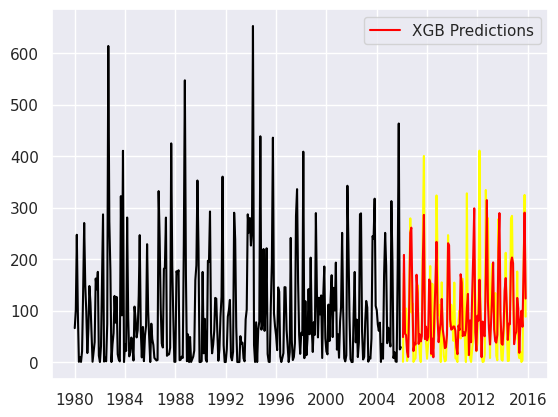

In [ ]:
# plotting
train_dates = weather[weather['date'] < pd.to_datetime("1/1/2006")]['date']
test_dates = weather[weather['date'] > pd.to_datetime("1/1/2006")]['date']

plt.plot(train_dates, y_train.values, color="black")
plt.plot(test_dates, y_test.values, color="yellow")
plt.plot(test_dates, y_pred, color='red', label = 'XGB Predictions')

plt.legend()